# **STEP 1 | IMPORTING LIBRARIES & DATASET**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,4)

# Load dataset (fixed path)
df = pd.read_csv("/content/drive/MyDrive/Dataset/daily-website-visitors.csv")



In [12]:
# Correct date format: MM/DD/YYYY
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

# Sort & set index
df = df.sort_values("Date")
df = df.set_index("Date")

In [13]:
# Basic Dataset Overview
print("Shape of dataset:", df.shape)
print("\n--- INFO ---")
print(df.info())
print("\n--- HEAD ---")
display(df.head())
print("\n--- DESCRIBE ---")
display(df.describe().T)

# Missing Values
print("\n--- MISSING VALUES ---")
print(df.isnull().sum())

# Duplicates
print("\nDuplicate rows:", df.duplicated().sum())

Shape of dataset: (2167, 7)

--- INFO ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2167 entries, 2014-09-14 to 2020-08-19
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Page.Loads         2167 non-null   object
 4   Unique.Visits      2167 non-null   object
 5   First.Time.Visits  2167 non-null   object
 6   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(5)
memory usage: 135.4+ KB
None

--- HEAD ---


,Row,Day,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,,,,
2014-09-14,1,Sunday,1,"2,146","1,582","1,430",152
2014-09-15,2,Monday,2,"3,621","2,528","2,297",231
2014-09-16,3,Tuesday,3,"3,698","2,630","2,352",278
2014-09-17,4,Wednesday,4,"3,667","2,614","2,327",287
2014-09-18,5,Thursday,5,"3,316","2,366","2,130",236



--- DESCRIBE ---


,count,mean,std,min,25%,50%,75%,max
Row,2167.0,1084.000000,625.703338,1.0,542.5,1084.0,1625.5,2167.0
Day.Of.Week,2167.0,3.997231,2.000229,1.0,2.0,4.0,6.0,7.0



--- MISSING VALUES ---
Row                  0
Day                  0
Day.Of.Week          0
Page.Loads           0
Unique.Visits        0
First.Time.Visits    0
Returning.Visits     0
dtype: int64

Duplicate rows: 0


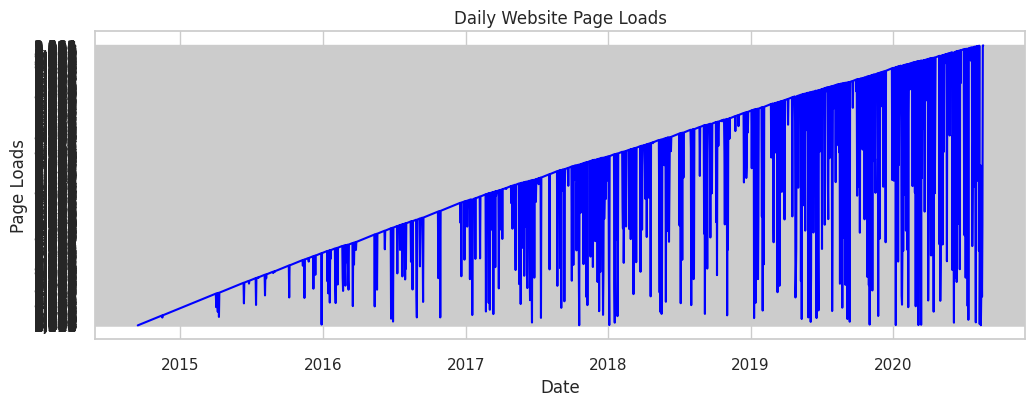

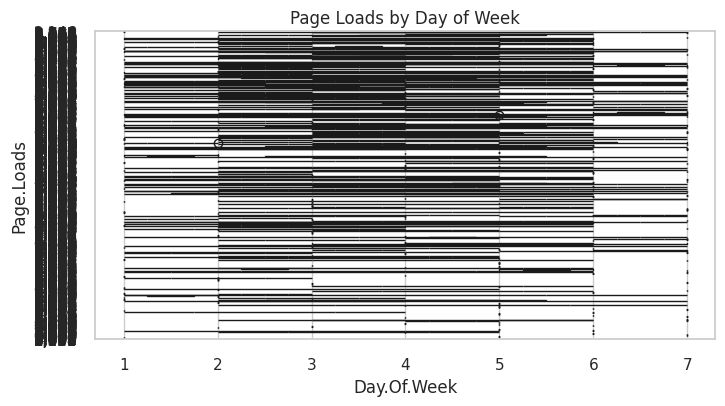

In [14]:
# STARTER VISUALIZATIONS

# 1) Time Series of Page Loads
plt.figure(figsize=(12,4))
plt.plot(df.index, df["Page.Loads"], color="blue")
plt.title("Daily Website Page Loads")
plt.xlabel("Date")
plt.ylabel("Page Loads")
plt.grid(True)
plt.show()

# 2) Day-of-Week Pattern
plt.figure(figsize=(8,4))
sns.boxplot(x=df["Day.Of.Week"], y=df["Page.Loads"], palette="viridis")
plt.title("Page Loads by Day of Week")
plt.show()

# **STEP 2 | DATA CLEANING**

In [15]:
clean_df = df.copy()

# Removing commas and convert numeric columns
numeric_cols = ["Page.Loads", "Unique.Visits", "First.Time.Visits", "Returning.Visits"]

for col in numeric_cols:
    clean_df[col] = clean_df[col].astype(str).str.replace(",", "")
    clean_df[col] = pd.to_numeric(clean_df[col], errors="coerce")

In [16]:
# Converting Day column to category
clean_df["Day"] = clean_df["Day"].astype("category")

In [17]:
# Checking data types again
print("\n--- UPDATED INFO ---")
print(clean_df.info())


--- UPDATED INFO ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2167 entries, 2014-09-14 to 2020-08-19
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Row                2167 non-null   int64   
 1   Day                2167 non-null   category
 2   Day.Of.Week        2167 non-null   int64   
 3   Page.Loads         2167 non-null   int64   
 4   Unique.Visits      2167 non-null   int64   
 5   First.Time.Visits  2167 non-null   int64   
 6   Returning.Visits   2167 non-null   int64   
dtypes: category(1), int64(6)
memory usage: 121.0 KB
None


In [18]:
# Summary after cleaning
print("\n--- CLEANED DESCRIBE ---")
display(clean_df.describe().T)
print("\n--- Unique Values in Day Column ---")
print(clean_df["Day"].unique())


--- CLEANED DESCRIBE ---


,count,mean,std,min,25%,50%,75%,max
Row,2167.0,1084.000000,625.703338,1.0,542.5,1084.0,1625.5,2167.0
Day.Of.Week,2167.0,3.997231,2.000229,1.0,2.0,4.0,6.0,7.0
Page.Loads,2167.0,4116.989386,1350.977843,1002.0,3114.5,4106.0,5020.5,7984.0
Unique.Visits,2167.0,2943.646516,977.886472,667.0,2226.0,2914.0,3667.5,5541.0
First.Time.Visits,2167.0,2431.824181,828.704688,522.0,1830.0,2400.0,3038.0,4616.0
Returning.Visits,2167.0,511.822335,168.736370,133.0,388.5,509.0,626.5,1036.0



--- Unique Values in Day Column ---
['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
                         'Wednesday']


In [19]:
# Basic sanity checks
print("\nAny remaining null values?")
print(clean_df.isnull().sum())


Any remaining null values?
Row                  0
Day                  0
Day.Of.Week          0
Page.Loads           0
Unique.Visits        0
First.Time.Visits    0
Returning.Visits     0
dtype: int64


# **STEP 3 | UNIVARIATE ANALYSIS**

In [20]:
plt.style.use("seaborn-v0_8")

import matplotlib.pyplot as plt
import seaborn as sns

# Summary stats
print("\n==== SUMMARY STATISTICS ====")
display(clean_df.describe().T)




==== SUMMARY STATISTICS ====


,count,mean,std,min,25%,50%,75%,max
Row,2167.0,1084.000000,625.703338,1.0,542.5,1084.0,1625.5,2167.0
Day.Of.Week,2167.0,3.997231,2.000229,1.0,2.0,4.0,6.0,7.0
Page.Loads,2167.0,4116.989386,1350.977843,1002.0,3114.5,4106.0,5020.5,7984.0
Unique.Visits,2167.0,2943.646516,977.886472,667.0,2226.0,2914.0,3667.5,5541.0
First.Time.Visits,2167.0,2431.824181,828.704688,522.0,1830.0,2400.0,3038.0,4616.0
Returning.Visits,2167.0,511.822335,168.736370,133.0,388.5,509.0,626.5,1036.0


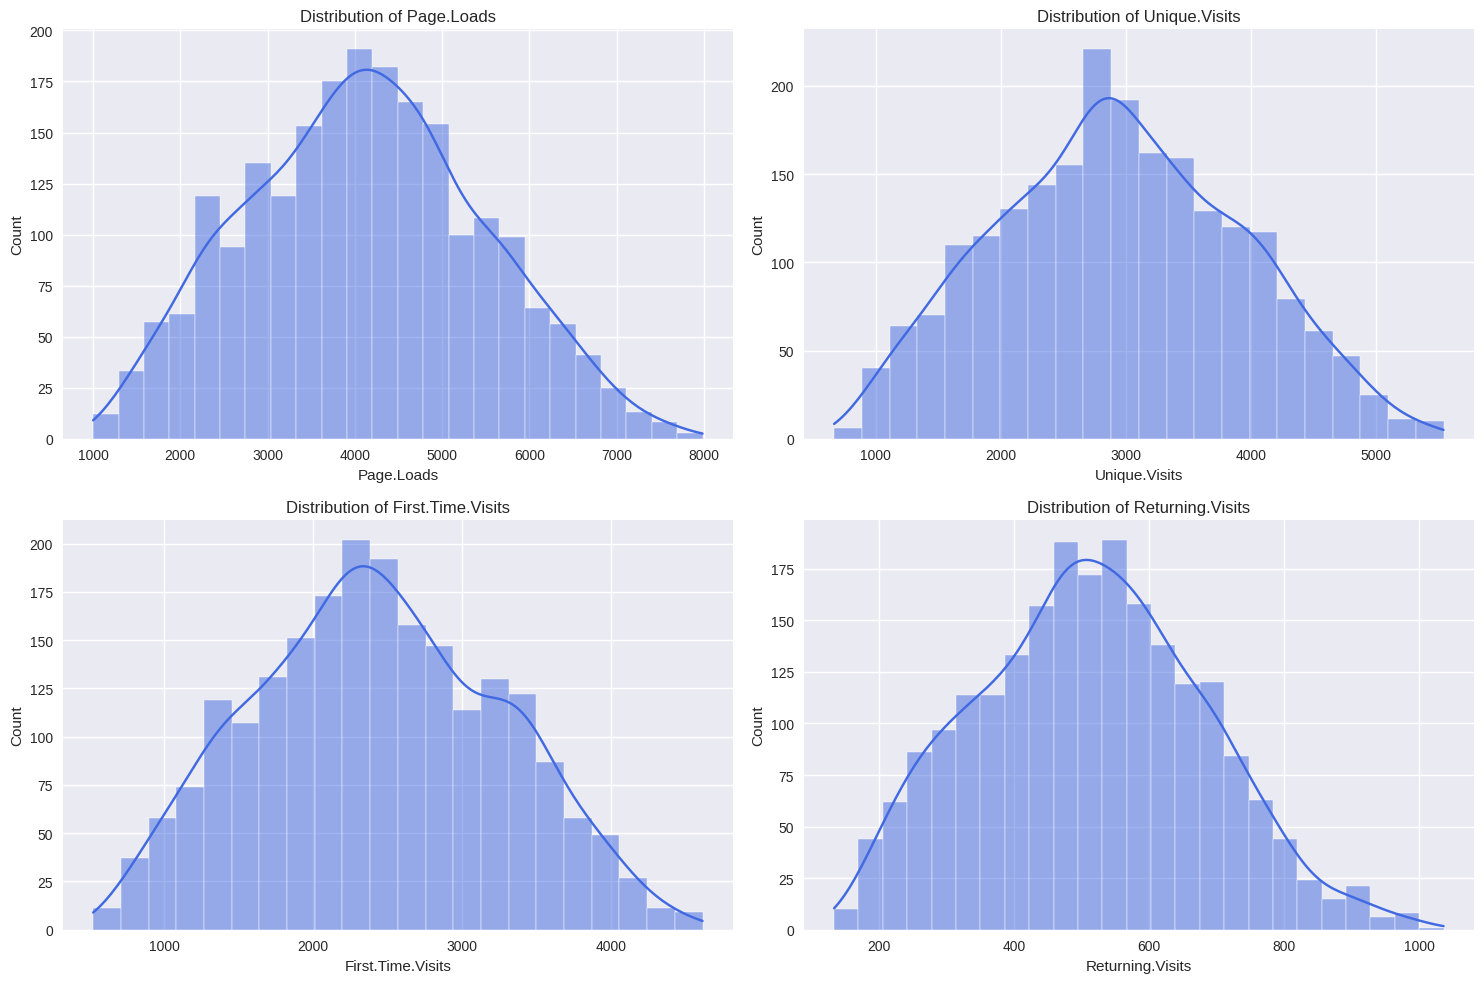

In [21]:
# Histograms for key metrics
num_cols = ["Page.Loads", "Unique.Visits", "First.Time.Visits", "Returning.Visits"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(clean_df[col], kde=True, color="royalblue")
    plt.title(f"Distribution of {col}", fontsize=12)
plt.tight_layout()
plt.show()

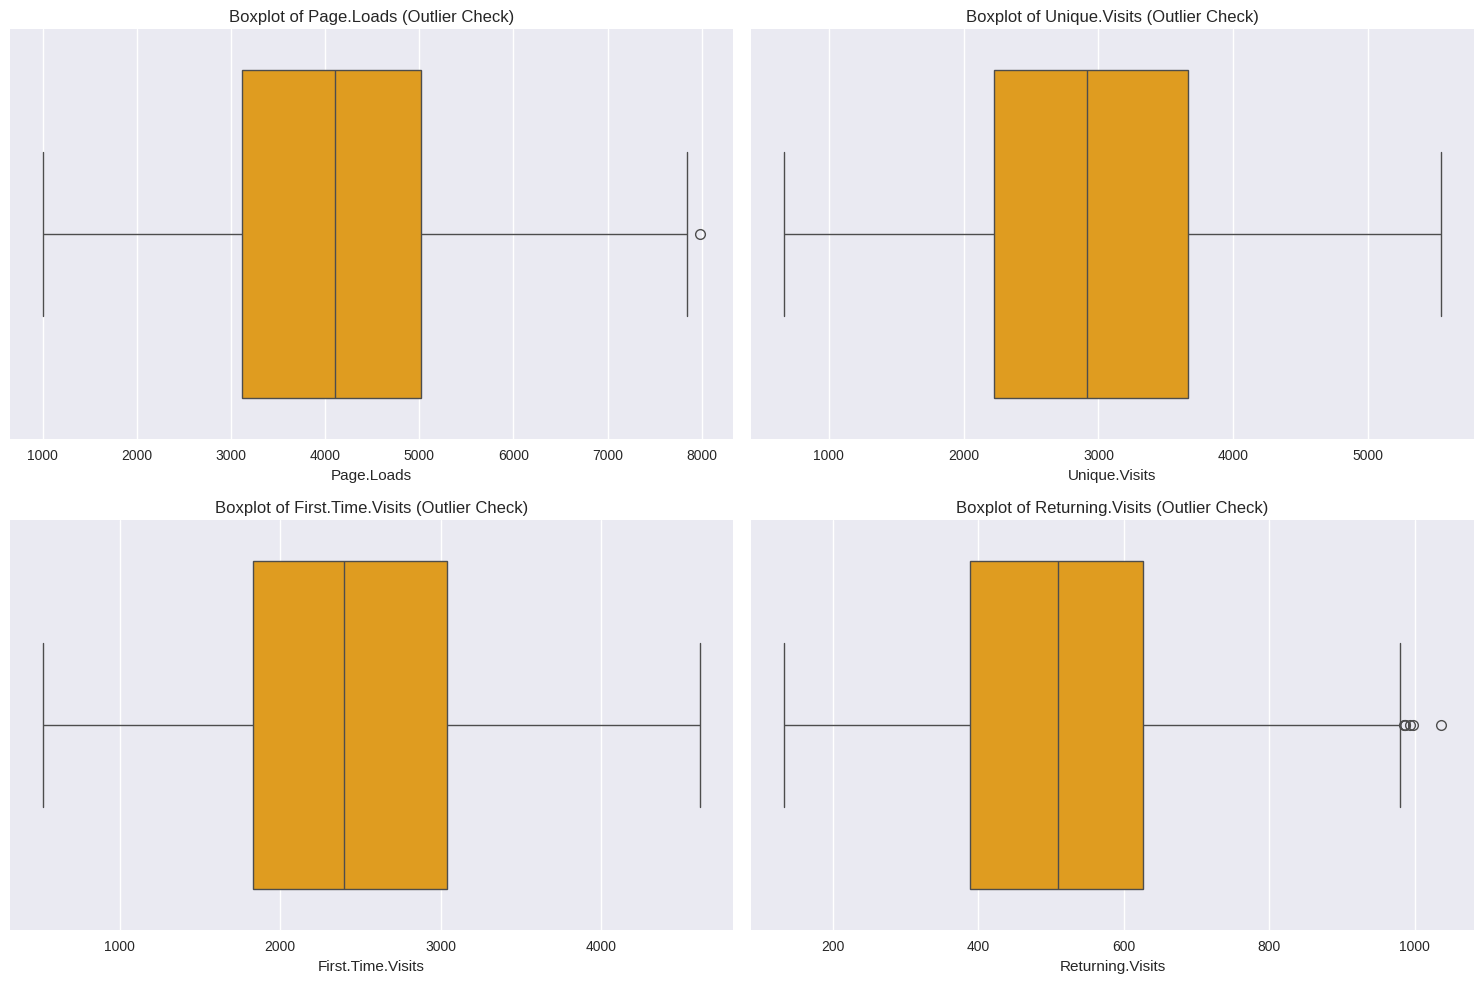

In [22]:
# Boxplots to detect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=clean_df[col], color="orange")
    plt.title(f"Boxplot of {col} (Outlier Check)")
plt.tight_layout()
plt.show()

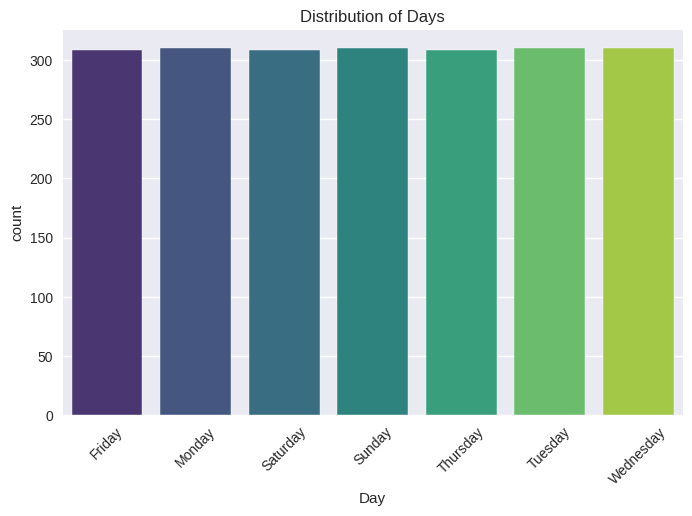

In [23]:
# Day-of-week distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=clean_df, x="Day", palette="viridis")
plt.title("Distribution of Days")
plt.xticks(rotation=45)
plt.show()

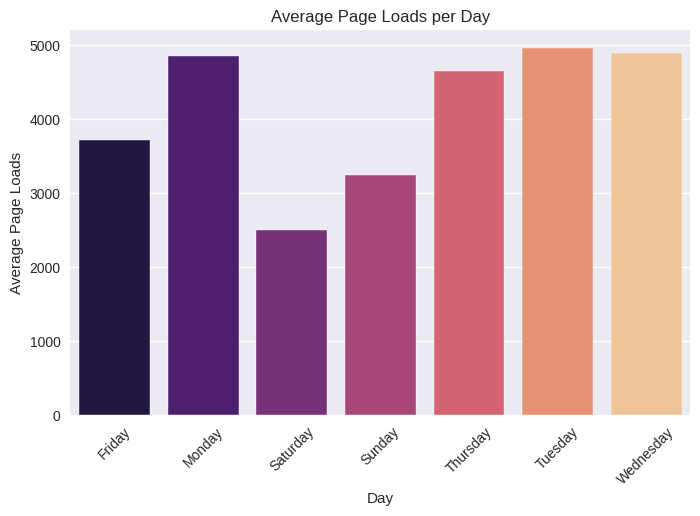

In [24]:
# Mean traffic per day
day_mean = clean_df.groupby("Day")["Page.Loads"].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=day_mean.index, y=day_mean.values, palette="magma")
plt.title("Average Page Loads per Day")
plt.xticks(rotation=45)
plt.ylabel("Average Page Loads")
plt.show()

# **STEP 4 | UNIVARIATE ANALYSIS**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,4)

numeric_cols = ["Page.Loads", "Unique.Visits", "First.Time.Visits", "Returning.Visits"]

for col in numeric_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(",", "")
        .str.strip()
    )
    df[col] = pd.to_numeric(df[col], errors="coerce")

    # If any NaN appears after conversion → fill with median
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

print("\n===== SUMMARY STATISTICS (Numerical Columns) =====")
summary_stats = df[numeric_cols].describe().T
print(summary_stats)


===== SUMMARY STATISTICS (Numerical Columns) =====
                    count         mean          std     min     25%     50%  \
Page.Loads         2167.0  4116.989386  1350.977843  1002.0  3114.5  4106.0   
Unique.Visits      2167.0  2943.646516   977.886472   667.0  2226.0  2914.0   
First.Time.Visits  2167.0  2431.824181   828.704688   522.0  1830.0  2400.0   
Returning.Visits   2167.0   511.822335   168.736370   133.0   388.5   509.0   

                      75%     max  
Page.Loads         5020.5  7984.0  
Unique.Visits      3667.5  5541.0  
First.Time.Visits  3038.0  4616.0  
Returning.Visits    626.5  1036.0  


In [26]:
# EXTRA STATISTICS — Mean, Median, Mode, Variance

extra_stats = pd.DataFrame({
    "Mean": df[numeric_cols].mean(),
    "Median": df[numeric_cols].median(),
    "Mode": df[numeric_cols].mode().iloc[0],
    "Variance": df[numeric_cols].var(),
    "Std Dev": df[numeric_cols].std()
})
print("\n===== EXTRA STATISTICS =====")
print(extra_stats)


===== EXTRA STATISTICS =====
                          Mean  Median    Mode      Variance      Std Dev
Page.Loads         4116.989386  4106.0  2948.0  1.825141e+06  1350.977843
Unique.Visits      2943.646516  2914.0  1197.0  9.562620e+05   977.886472
First.Time.Visits  2431.824181  2400.0  3133.0  6.867515e+05   828.704688
Returning.Visits    511.822335   509.0   552.0  2.847196e+04   168.736370


In [27]:
# OUTLIER DETECTION — IQR method

outlier_report = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)][col].count()
    outlier_report[col] = outliers

outlier_df = pd.DataFrame.from_dict(outlier_report, orient="index", columns=["Outlier_Count"])
print("\n===== OUTLIER REPORT =====")
print(outlier_df)


===== OUTLIER REPORT =====
                   Outlier_Count
Page.Loads                     1
Unique.Visits                  0
First.Time.Visits              0
Returning.Visits               6


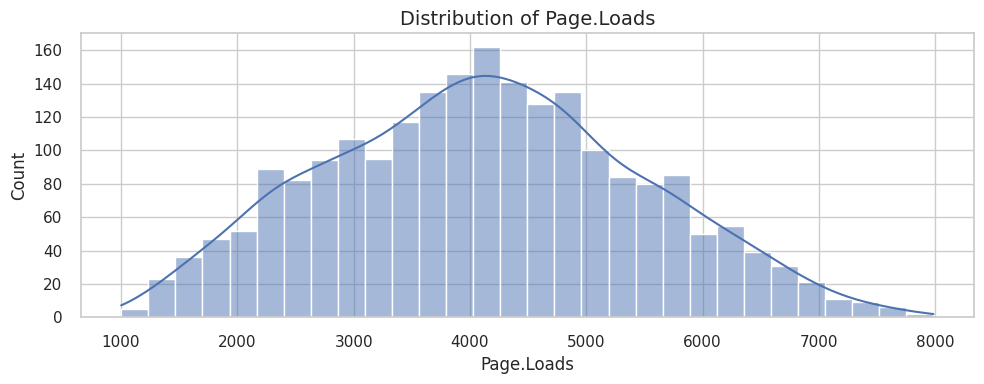

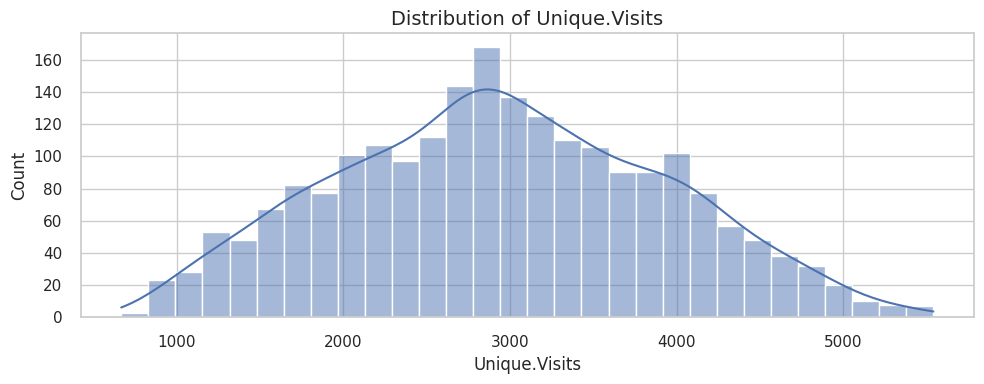

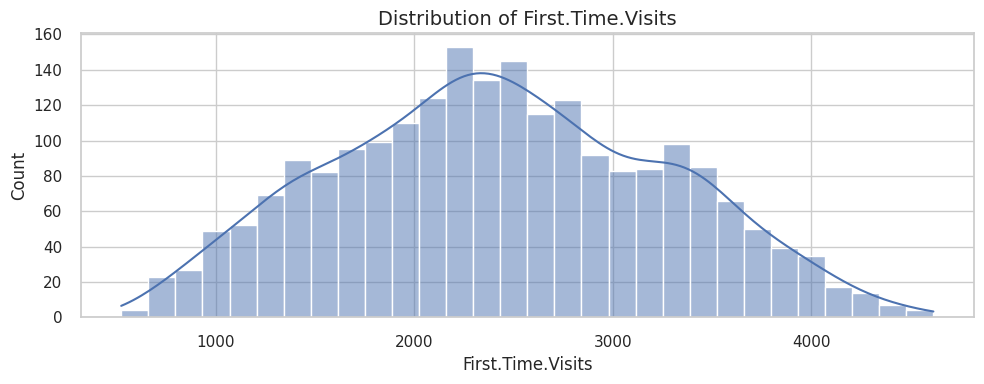

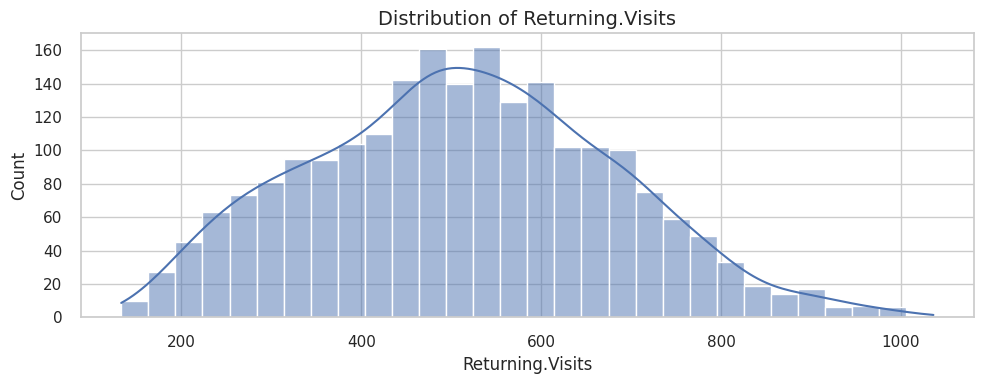

In [28]:
# VISUALIZATIONS — Histograms for all numeric columns
for col in numeric_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

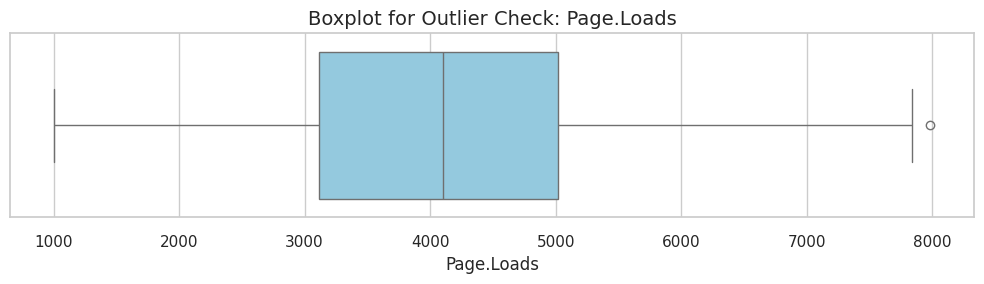

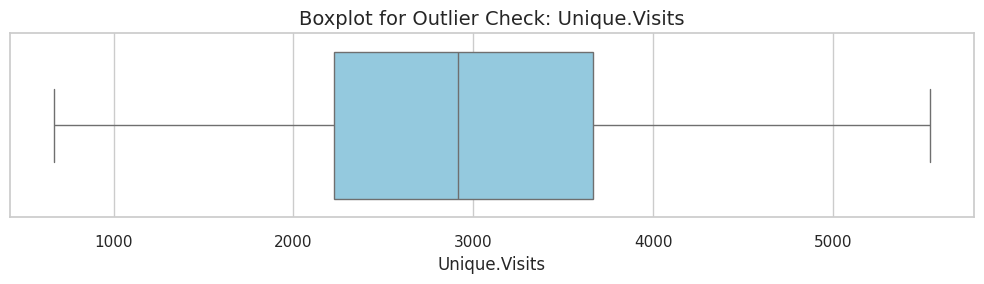

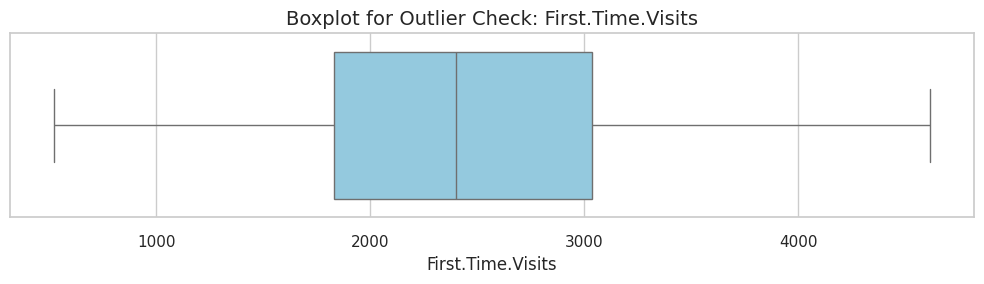

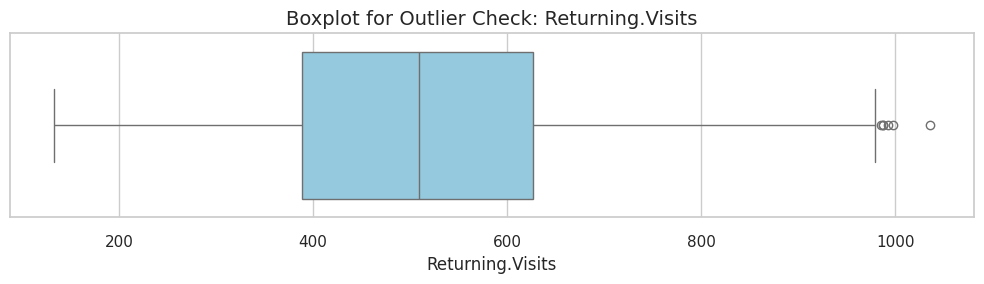

In [29]:
# BOX PLOTS — Outlier visualization

for col in numeric_cols:
    plt.figure(figsize=(10,3))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot for Outlier Check: {col}", fontsize=14)
    plt.tight_layout()
    plt.show()

# **STEP 5 | BIVARIATE & MULTIVARIATE ANALYSIS**

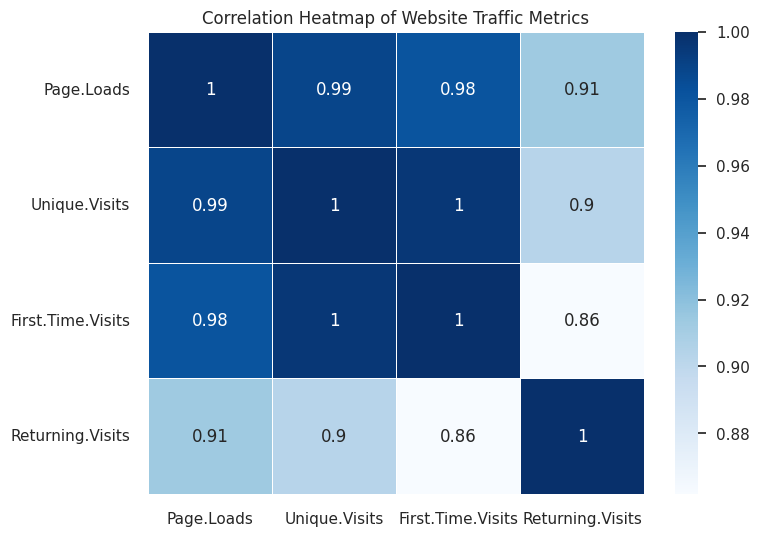


===== CORRELATION MATRIX (TEXT) =====
                   Page.Loads  Unique.Visits  First.Time.Visits  \
Page.Loads           1.000000       0.988691           0.980704   
Unique.Visits        0.988691       1.000000           0.996164   
First.Time.Visits    0.980704       0.996164           1.000000   
Returning.Visits     0.913340       0.902950           0.861882   

                   Returning.Visits  
Page.Loads                 0.913340  
Unique.Visits              0.902950  
First.Time.Visits          0.861882  
Returning.Visits           1.000000  


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,5)

numeric_cols = ["Page.Loads", "Unique.Visits", "First.Time.Visits", "Returning.Visits"]

# CORRELATION HEATMAP

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="Blues", linewidths=.5)
plt.title("Correlation Heatmap of Website Traffic Metrics")
plt.show()

print("\n===== CORRELATION MATRIX (TEXT) =====")
print(df[numeric_cols].corr())

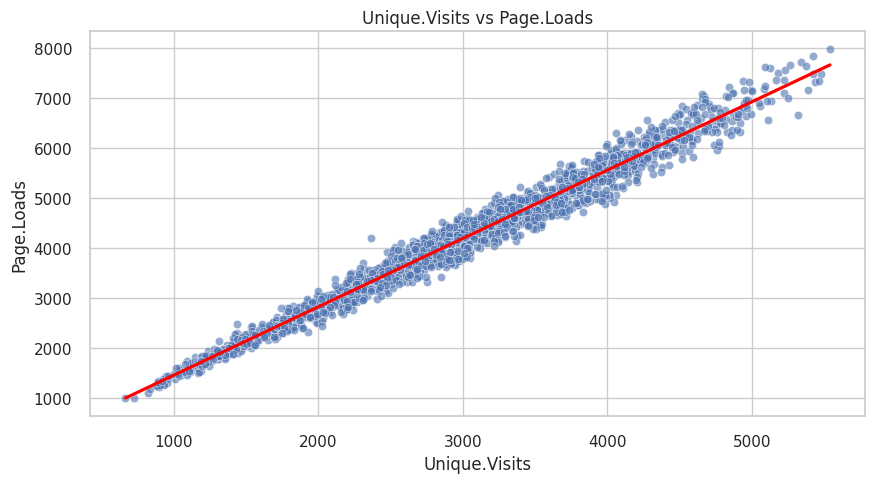

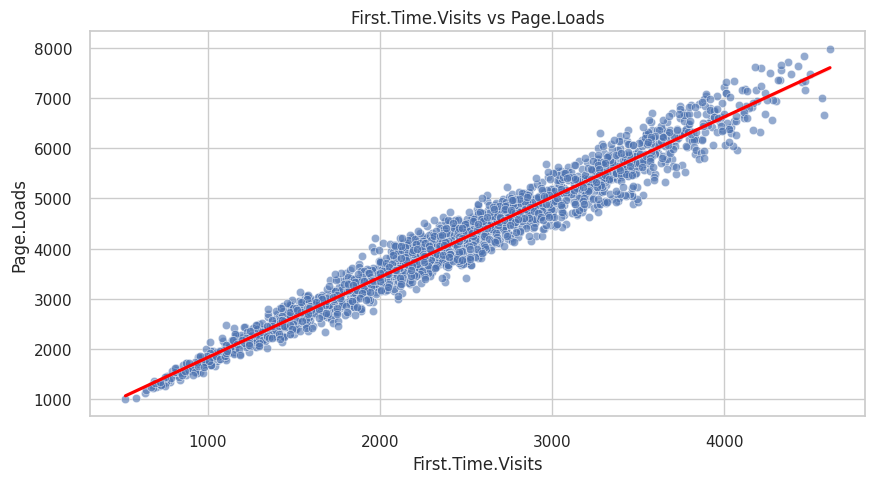

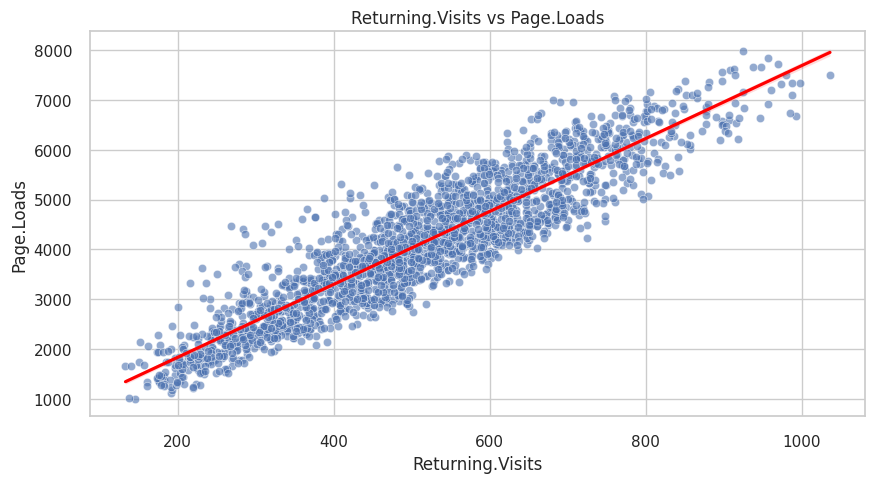


===== PAIRWISE RELATIONSHIP STRENGTH =====
Unique.Visits vs Page.Loads: correlation = 0.9887
First.Time.Visits vs Page.Loads: correlation = 0.9807
Returning.Visits vs Page.Loads: correlation = 0.9133


In [31]:
# SCATTERPLOTS (Numeric vs Numeric)

pair_list = [
    ("Unique.Visits", "Page.Loads"),
    ("First.Time.Visits", "Page.Loads"),
    ("Returning.Visits", "Page.Loads"),
]

for x, y in pair_list:
    plt.figure(figsize=(10,5))
    sns.scatterplot(x=df[x], y=df[y], alpha=0.6)
    sns.regplot(x=df[x], y=df[y], scatter=False, color="red")
    plt.title(f"{x} vs {y}")
    plt.show()

print("\n===== PAIRWISE RELATIONSHIP STRENGTH =====")
for x, y in pair_list:
    corr_val = df[[x, y]].corr().iloc[0, 1]
    print(f"{x} vs {y}: correlation = {corr_val:.4f}")

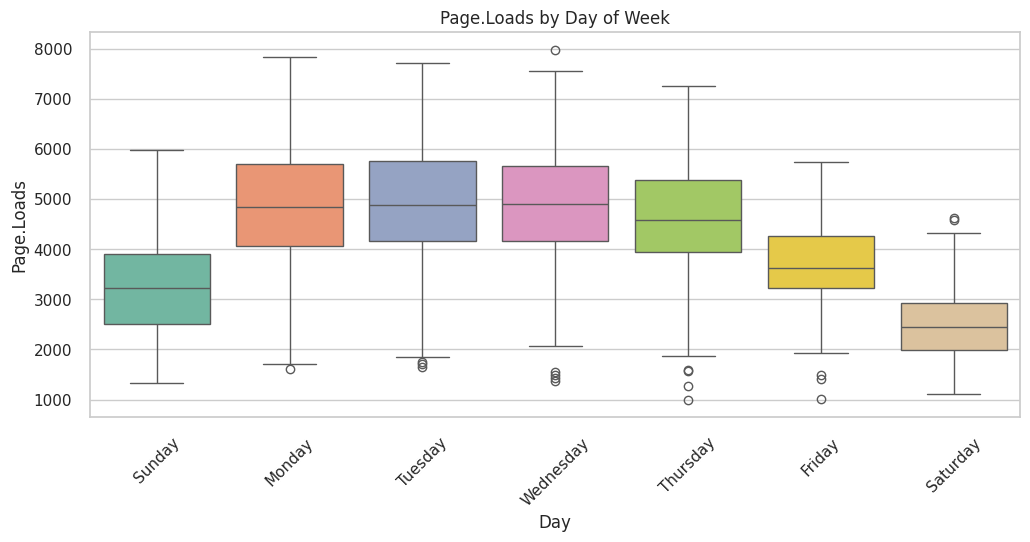

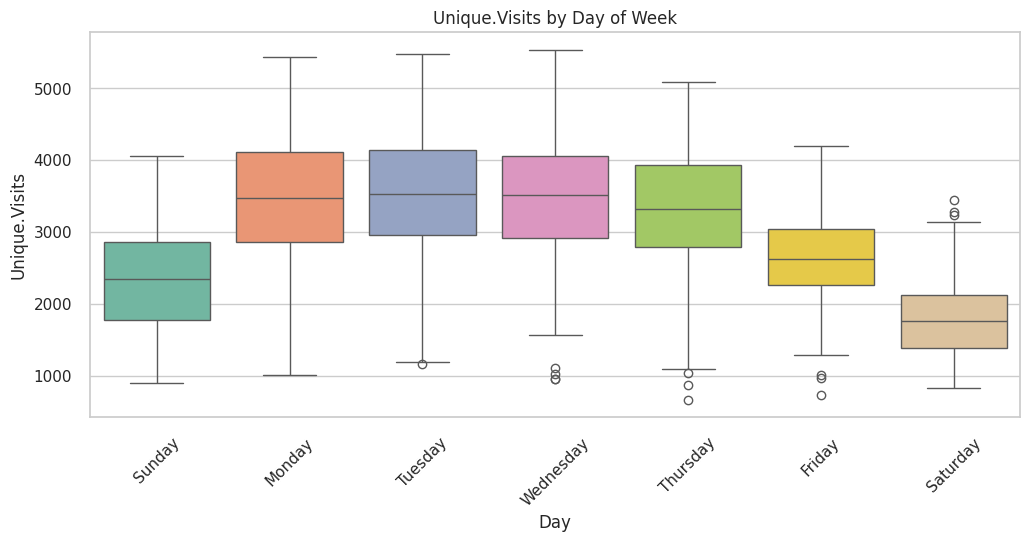

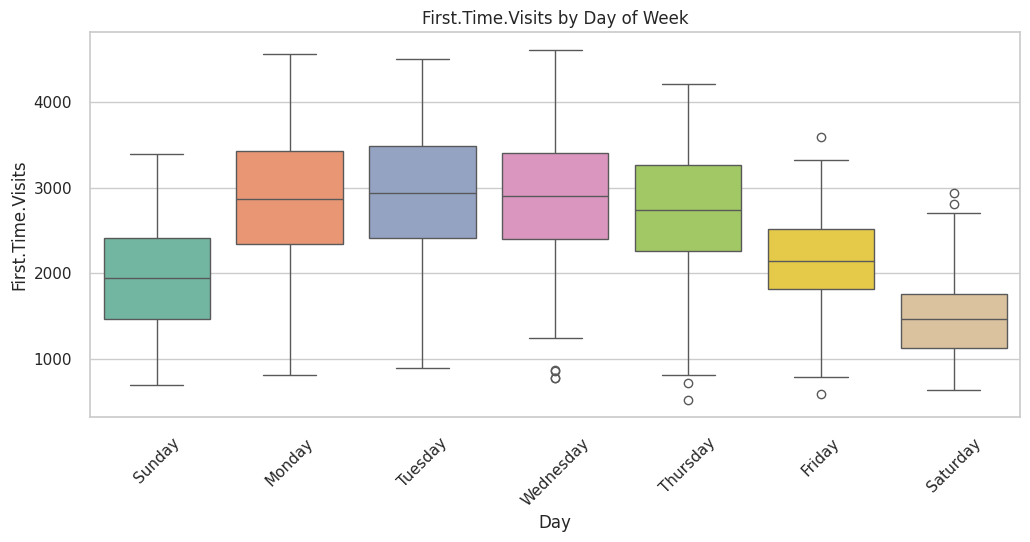

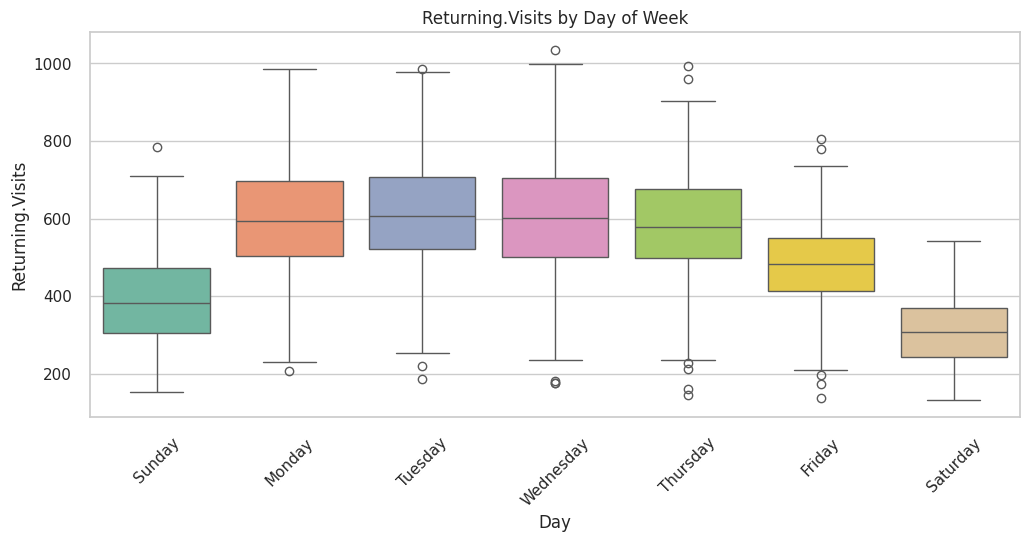

In [32]:
# BOX PLOTS (Numeric vs Categorical: Day)

for col in numeric_cols:
    plt.figure(figsize=(12,5))
    sns.boxplot(x=df["Day"], y=df[col], palette="Set2")
    plt.title(f"{col} by Day of Week")
    plt.xticks(rotation=45)
    plt.show()

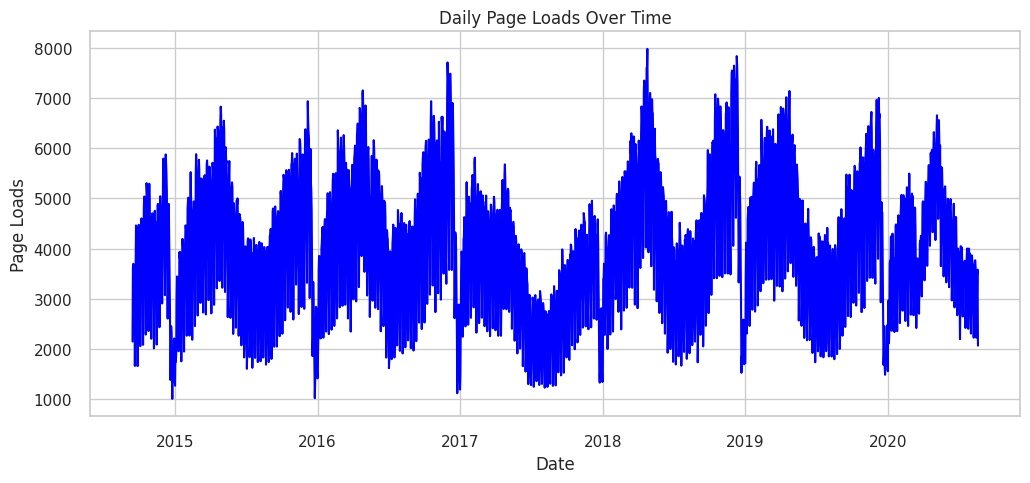

In [33]:
# DAILY TRAFFIC TRENDS OVER TIME

plt.figure(figsize=(12,5))
plt.plot(df.index, df["Page.Loads"], color="blue")
plt.title("Daily Page Loads Over Time")
plt.ylabel("Page Loads")
plt.xlabel("Date")
plt.show()

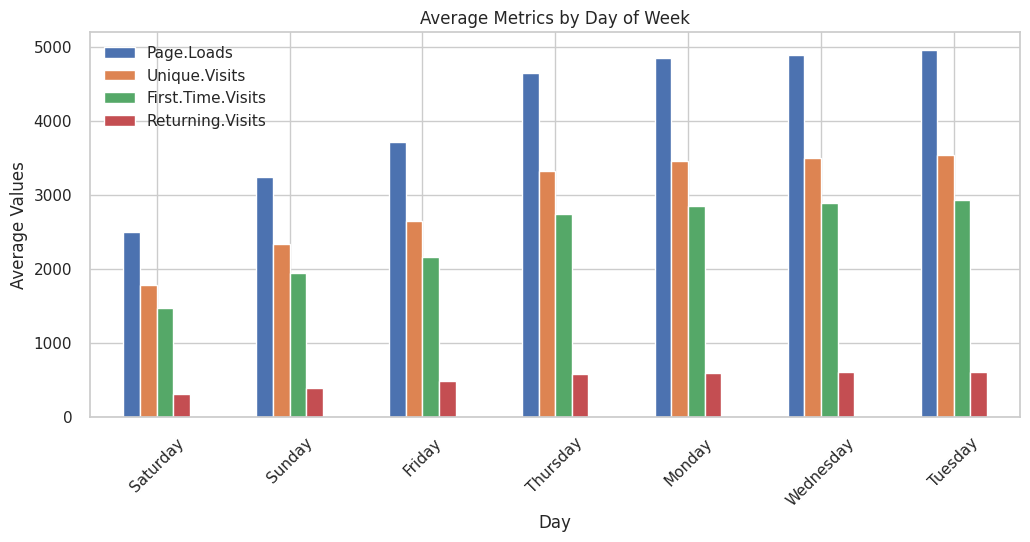


===== WEEKLY AVERAGE METRICS =====
            Page.Loads  Unique.Visits  First.Time.Visits  Returning.Visits
Day                                                                       
Saturday   2501.025890    1786.747573        1477.181230        309.566343
Sunday     3246.980645    2341.270968        1949.025806        392.245161
Friday     3719.860841    2646.770227        2164.417476        482.352751
Thursday   4651.355987    3327.553398        2747.317152        580.236246
Monday     4845.680645    3458.425806        2858.180645        600.245161
Wednesday  4893.916129    3502.012903        2895.490323        606.522581
Tuesday    4955.335484    3539.293548        2928.232258        611.061290


In [34]:
# WEEKLY PATTERN ANALYSIS

weekly_avg = df.groupby("Day")[numeric_cols].mean().sort_values(by="Page.Loads")

weekly_avg.plot(kind="bar", figsize=(12,5))
plt.title("Average Metrics by Day of Week")
plt.ylabel("Average Values")
plt.xticks(rotation=45)
plt.show()

print("\n===== WEEKLY AVERAGE METRICS =====")
print(weekly_avg)

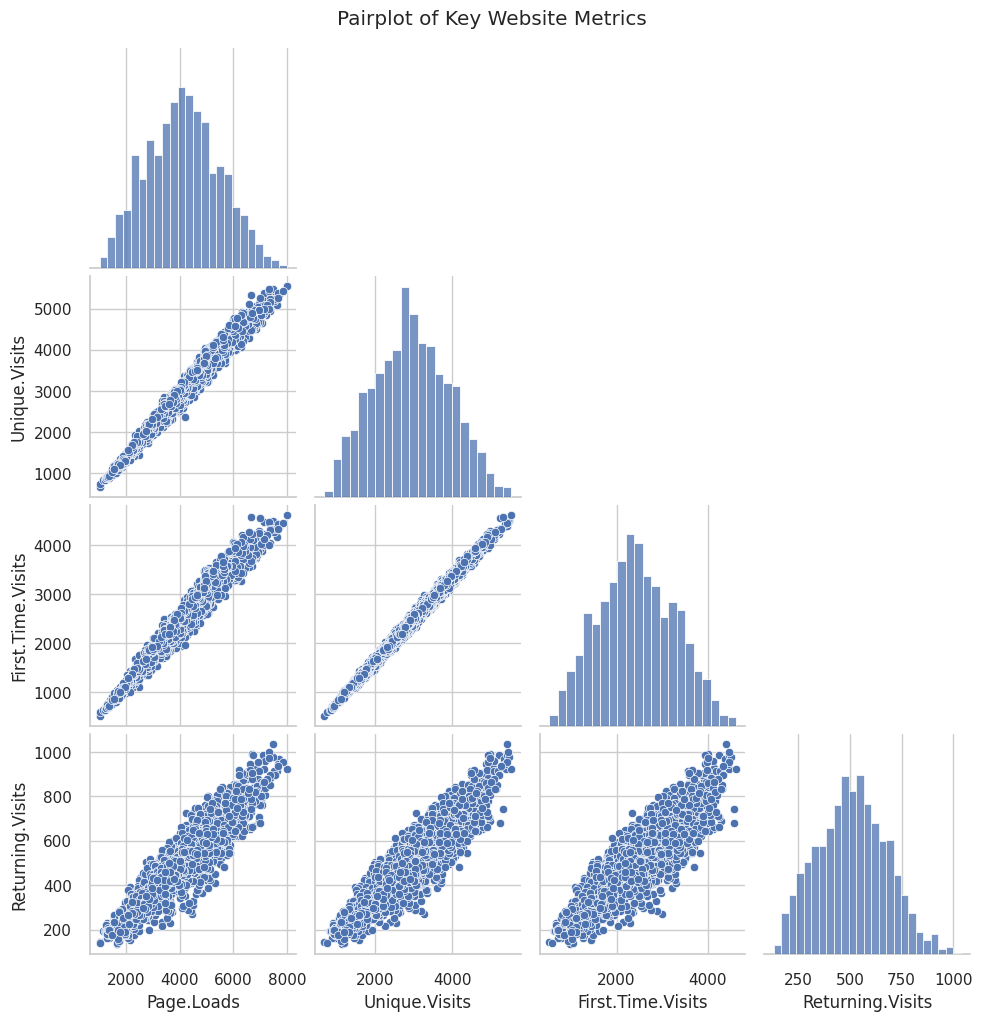

In [35]:
# PAIRPLOT (Multivariate)

sns.pairplot(df[numeric_cols], corner=True)
plt.suptitle("Pairplot of Key Website Metrics", y=1.02)
plt.show()

# **STEP 6 | FEATURE ENGINEERING FOR FORECASTING**

In [36]:
df_fe = df.copy()

print("\n===== STEP 6: FEATURE ENGINEERING STARTED =====\n")

# DATE-BASED FEATURES

df_fe["Day_num"] = df_fe.index.day
df_fe["Month"] = df_fe.index.month
df_fe["Year"] = df_fe.index.year
df_fe["WeekOfYear"] = df_fe.index.isocalendar().week.astype(int)
df_fe["Is_Weekend"] = df_fe.index.dayofweek.isin([5,6]).astype(int)

# LAG FEATURES (ESSENTIAL FOR FORECASTING)

df_fe["lag_1"] = df_fe["Page.Loads"].shift(1)
df_fe["lag_7"] = df_fe["Page.Loads"].shift(7)
df_fe["lag_14"] = df_fe["Page.Loads"].shift(14)

# ROLLING WINDOW FEATURES

df_fe["roll_7_mean"] = df_fe["Page.Loads"].rolling(7).mean()
df_fe["roll_14_mean"] = df_fe["Page.Loads"].rolling(14).mean()
df_fe["roll_30_mean"] = df_fe["Page.Loads"].rolling(30).mean()

df_fe["roll_7_std"] = df_fe["Page.Loads"].rolling(7).std()
df_fe["roll_14_std"] = df_fe["Page.Loads"].rolling(14).std()

# EXPANDING WINDOW FEATURES (GLOBAL TREND)

df_fe["expanding_mean"] = df_fe["Page.Loads"].expanding().mean()

# REMOVING ROWS WITH NaN DUE TO LAG/ROLLING

df_fe = df_fe.dropna()

print("New shape after feature engineering:", df_fe.shape)

print("\n===== NEW COLUMNS CREATED =====")
print(df_fe.columns.tolist())

print("\n===== FEATURE ENGINEERING PREVIEW =====")
print(df_fe.head())


===== STEP 6: FEATURE ENGINEERING STARTED =====

New shape after feature engineering: (2138, 21)

===== NEW COLUMNS CREATED =====
['Row', 'Day', 'Day.Of.Week', 'Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits', 'Day_num', 'Month', 'Year', 'WeekOfYear', 'Is_Weekend', 'lag_1', 'lag_7', 'lag_14', 'roll_7_mean', 'roll_14_mean', 'roll_30_mean', 'roll_7_std', 'roll_14_std', 'expanding_mean']

===== FEATURE ENGINEERING PREVIEW =====
            Row        Day  Day.Of.Week  Page.Loads  Unique.Visits  \
Date                                                                 
2014-10-13   30     Monday            2        4814           3339   
2014-10-14   31    Tuesday            3        5040           3604   
2014-10-15   32  Wednesday            4        5028           3515   
2014-10-16   33   Thursday            5        4658           3331   
2014-10-17   34     Friday            6        3624           2477   

            First.Time.Visits  Returning.Visits  Day_num 

# **STEP 7 | TRAIN/TEST SPLIT + SCALING + BASELINE MODELS**

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# Using df_fe from previous step
df_ml = df_fe.copy()

# TARGET and FEATURES
target = "Page.Loads"
feature_cols = [c for c in df_ml.columns if c != target and c != "Day"]  # drop Day (string)

X = df_ml[feature_cols].copy()
y = df_ml[target].copy()

In [38]:
# Ensuring any remaining non-numeric columns are converted or dropped

for col in X.columns:
    if X[col].dtype == "object" or str(X[col].dtype).startswith("category"):
        try:
            X[col] = pd.to_numeric(X[col].astype(str).str.replace(",", "").str.strip(), errors="coerce")
        except:
            X.drop(columns=[col], inplace=True)

for col in X.columns:
    if X[col].isnull().sum() > 0:
        X[col].fillna(X[col].median(), inplace=True)

print("Final feature columns used (fixed):")
print(X.columns.tolist())

Final feature columns used (fixed):
['Row', 'Day.Of.Week', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits', 'Day_num', 'Month', 'Year', 'WeekOfYear', 'Is_Weekend', 'lag_1', 'lag_7', 'lag_14', 'roll_7_mean', 'roll_14_mean', 'roll_30_mean', 'roll_7_std', 'roll_14_std', 'expanding_mean']


In [39]:
# Train / Test split (time-based)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

print("\nTrain/Test Split Shapes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)


Train/Test Split Shapes:
X_train: (1710, 19) X_test: (428, 19)
y_train: (1710,) y_test: (428,)


In [40]:
# Scale numeric features
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

print("\nScaling applied on numeric columns:")
print(numeric_features)


Scaling applied on numeric columns:
['Row', 'Day.Of.Week', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits', 'Day_num', 'Month', 'Year', 'WeekOfYear', 'Is_Weekend', 'lag_1', 'lag_7', 'lag_14', 'roll_7_mean', 'roll_14_mean', 'roll_30_mean', 'roll_7_std', 'roll_14_std', 'expanding_mean']


In [41]:
# Models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, subsample=0.9, verbosity=0),
    "LightGBM": lgb.LGBMRegressor(n_estimators=300, learning_rate=0.05, max_depth=-1),
}

In [42]:
# Evaluation (safe MAPE)
def safe_metrics(y_true, y_pred):
    y_true_arr = np.array(y_true)
    y_pred_arr = np.array(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true_arr, y_pred_arr))
    mae = mean_absolute_error(y_true_arr, y_pred_arr)
    # avoid division by zero in MAPE
    denom = np.where(y_true_arr == 0, 1e-8, y_true_arr)
    mape = np.mean(np.abs((y_true_arr - y_pred_arr) / denom)) * 100
    r2 = r2_score(y_true_arr, y_pred_arr)
    return rmse, mae, mape, r2

In [43]:
# Train & evaluate
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    rmse, mae, mape, r2 = safe_metrics(y_test, preds)
    results.append([name, rmse, mae, mape, r2])
    print(f"\n===== {name} =====")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"R²: {r2:.4f}")

results_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "MAPE (%)", "R²"]).sort_values("R²", ascending=False)
print("\n\n===== BASELINE MODEL COMPARISON (sorted by R²) =====")
print(results_df.to_string(index=False))


===== Linear Regression =====
RMSE: 360.05
MAE: 303.44
MAPE: 7.79%
R²: 0.9078

===== Ridge Regression =====
RMSE: 361.54
MAE: 302.14
MAPE: 7.73%
R²: 0.9070

===== Random Forest =====
RMSE: 418.08
MAE: 351.87
MAPE: 8.63%
R²: 0.8757

===== XGBoost =====
RMSE: 365.02
MAE: 301.92
MAPE: 7.56%
R²: 0.9052
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3432
[LightGBM] [Info] Number of data points in the train set: 1710, number of used features: 19
[LightGBM] [Info] Start training from score 4145.448538

===== LightGBM =====
RMSE: 395.83
MAE: 329.29
MAPE: 8.15%
R²: 0.8885


===== BASELINE MODEL COMPARISON (sorted by R²) =====
            Model       RMSE        MAE  MAPE (%)       R²
Linear Regression 360.054127 303.444032  7.786813 0.907783
 Ridge Regression 361.535412 302.140936  7.725701 0.907022
          XGBoost 365.016524 301.923615  7.563409 0.9

In [44]:
# Saving results for later steps
results_df.to_csv("baseline_model_comparison.csv", index=False)
import joblib
joblib.dump(scaler, "scaler_step7.pkl")
print("\nSaved scaler as scaler_step7.pkl and results as baseline_model_comparison.csv")


Saved scaler as scaler_step7.pkl and results as baseline_model_comparison.csv


# **STEP 8 | HYPERPARAMETER TUNING (Optuna) for XGBoost**

In [45]:
! pip install optuna
import optuna
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,5)

# Using previously prepared X_train_scaled, X_test_scaled, y_train, y_test
try:
    X_train_scaled.shape
except NameError:
    raise RuntimeError("X_train_scaled / X_test_scaled / y_train / y_test not found. Run STEP 7 first.")

X_tr = X_train_scaled.values
y_tr = y_train.values
X_val = X_test_scaled.values
y_val = y_test.values

tscv = TimeSeriesSplit(n_splits=4)

def objective(trial):
    params = {
        "verbosity": 0,
        "objective": "reg:squarederror",
        "tree_method": "auto",
        "n_estimators": int(trial.suggest_int("n_estimators", 100, 800)),
        "max_depth": int(trial.suggest_int("max_depth", 3, 12)),
        "learning_rate": float(trial.suggest_loguniform("learning_rate", 0.01, 0.3)),
        "subsample": float(trial.suggest_uniform("subsample", 0.5, 1.0)),
        "colsample_bytree": float(trial.suggest_uniform("colsample_bytree", 0.4, 1.0)),
        "gamma": float(trial.suggest_loguniform("gamma", 1e-8, 10.0)),
        "min_child_weight": float(trial.suggest_loguniform("min_child_weight", 1e-3, 10.0)),
        "reg_alpha": float(trial.suggest_loguniform("reg_alpha", 1e-8, 10.0)),
        "reg_lambda": float(trial.suggest_loguniform("reg_lambda", 1e-8, 10.0)),
    }

    cv_scores = []
    for train_idx, val_idx in tscv.split(X_tr):
        X_t, X_v = X_tr[train_idx], X_tr[val_idx]
        y_t, y_v = y_tr[train_idx], y_tr[val_idx]

        # Build XGBRegressor and fit
        model = xgb.XGBRegressor(**params)
        model.fit(X_t, y_t)  # simple fit for CV folds
        preds = model.predict(X_v)
        rmse = np.sqrt(mean_squared_error(y_v, preds))
        cv_scores.append(rmse)

    return float(np.mean(cv_scores))

In [46]:
# Running optuna study
study = optuna.create_study(direction="minimize", study_name="xgb_opt_ts_fixed")
study.optimize(objective, n_trials=40, timeout=60*8)  # up to ~8 minutes or 40 trials

print("\n===== OPTUNA TUNING RESULTS =====")
print("Number of finished trials:", len(study.trials))
print("Best trial RMSE (CV):", study.best_value)
print("Best params:")
for k, v in study.best_trial.params.items():
    print(f"  {k}: {v}")

[I 2025-12-03 11:38:52,235] A new study created in memory with name: xgb_opt_ts_fixed
[I 2025-12-03 11:39:15,582] Trial 0 finished with value: 189.06288479724003 and parameters: {'n_estimators': 149, 'max_depth': 10, 'learning_rate': 0.10317303262728758, 'subsample': 0.6593890192768013, 'colsample_bytree': 0.8476109143176567, 'gamma': 0.0019151290581434577, 'min_child_weight': 0.012589330323695377, 'reg_alpha': 0.0033862579061299655, 'reg_lambda': 7.745706148528176e-07}. Best is trial 0 with value: 189.06288479724003.
[I 2025-12-03 11:39:18,945] Trial 1 finished with value: 221.04683506295143 and parameters: {'n_estimators': 482, 'max_depth': 9, 'learning_rate': 0.0942889045035284, 'subsample': 0.9548157033766089, 'colsample_bytree': 0.41167426461811896, 'gamma': 0.08107527875570292, 'min_child_weight': 0.025290665046902354, 'reg_alpha': 8.727376264207072e-06, 'reg_lambda': 0.006515925415543463}. Best is trial 0 with value: 189.06288479724003.
[I 2025-12-03 11:39:22,655] Trial 2 finish


===== OPTUNA TUNING RESULTS =====
Number of finished trials: 40
Best trial RMSE (CV): 177.2222161253415
Best params:
  n_estimators: 433
  max_depth: 3
  learning_rate: 0.013644754962402137
  subsample: 0.5486655524209894
  colsample_bytree: 0.8505485813626934
  gamma: 0.003965974977474646
  min_child_weight: 0.0036561844789371957
  reg_alpha: 0.0009441336915075938
  reg_lambda: 0.015043290689641116


In [47]:
# Training final model on full training set with best params (no CV here)
best_params = study.best_trial.params
best_params.update({
    "verbosity": 0,
    "objective": "reg:squarederror",
    "tree_method": "auto"
})
best_params["n_estimators"] = int(best_params["n_estimators"])
best_params["max_depth"] = int(best_params["max_depth"])

final_model = xgb.XGBRegressor(**best_params)
final_model.fit(X_tr, y_tr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8505485813626934, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=0.003965974977474646, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.013644754962402137,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=0.0036561844789371957, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=433,
             n_jobs=None, num_parallel_tree=None, ...)

In [48]:
# Save model & study
joblib.dump(final_model, "xgb_optuna_tuned_model_fixed.pkl")
joblib.dump(study, "xgb_optuna_study_fixed.pkl")
print("\nSaved tuned model -> xgb_optuna_tuned_model_fixed.pkl")
print("Saved optuna study  -> xgb_optuna_study_fixed.pkl")


Saved tuned model -> xgb_optuna_tuned_model_fixed.pkl
Saved optuna study  -> xgb_optuna_study_fixed.pkl


In [49]:
# Evaluate on hold-out test set
y_pred = final_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
mape = np.mean(np.abs((y_val - y_pred) / np.where(y_val == 0, 1e-8, y_val))) * 100
r2 = r2_score(y_val, y_pred)

print("\n===== FINAL MODEL PERFORMANCE (ON HOLD-OUT TEST SET) =====")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.4f}")


===== FINAL MODEL PERFORMANCE (ON HOLD-OUT TEST SET) =====
RMSE: 374.03
MAE: 309.81
MAPE: 7.65%
R²: 0.9005


In [50]:
# Feature importances (gain)
try:
    fi = final_model.get_booster().get_score(importance_type="gain")
    fi_df = pd.DataFrame([{"feature": k, "importance": v} for k, v in fi.items()]).sort_values("importance", ascending=False)
    print("\nTop 15 feature importances (gain):")
    print(fi_df.head(15).to_string(index=False))
except Exception as e:
    print("Could not extract feature importances:", e)


Top 15 feature importances (gain):
feature   importance
     f2 5.641643e+07
     f3 2.733949e+07
    f11 4.217674e+06
     f4 2.766348e+06
    f13 1.867734e+06
     f7 1.072211e+06
     f0 8.157050e+05
     f9 6.308704e+05
    f12 5.741097e+05
    f10 3.470165e+05
    f14 3.023782e+05
     f8 2.638798e+05
    f18 2.411418e+05
     f6 2.120100e+05
    f15 1.831052e+05


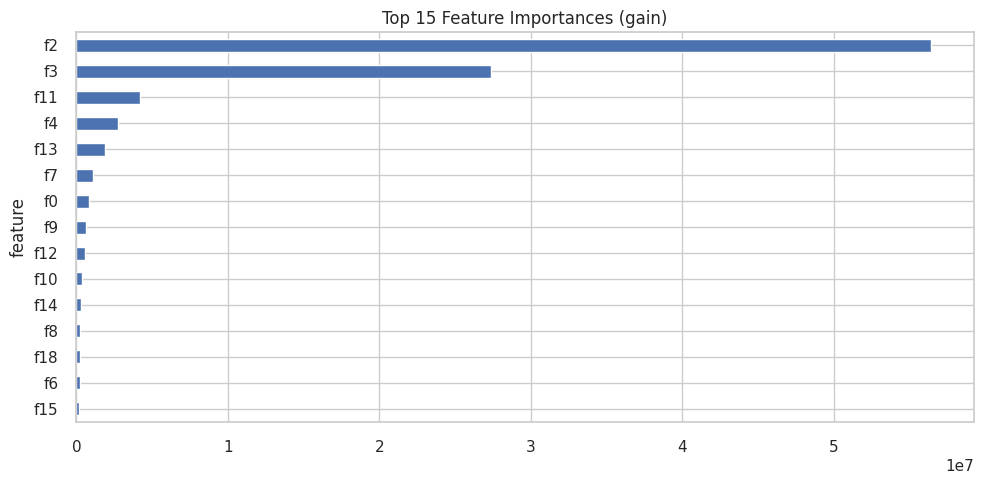

In [51]:
# Plotting top 15 features
try:
    top = fi_df.head(15).copy()
    top.plot(kind="barh", x="feature", y="importance", legend=False)
    plt.gca().invert_yaxis()
    plt.title("Top 15 Feature Importances (gain)")
    plt.tight_layout()
    plt.show()
except Exception:
    pass

# **STEP 9 | MODEL EVALUATION**

In [52]:
import joblib, numpy as np, pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

best_params = {
    "n_estimators": 637,
    "max_depth": 4,
    "learning_rate": 0.023565877480637758,
    "subsample": 0.9168971096369806,
    "colsample_bytree": 0.5935876827926635,
    "gamma": 0.35256388807375594,
    "min_child_weight": 1.4500218788485908,
    "reg_alpha": 4.083093390209387e-06,
    "reg_lambda": 0.010580528030572444,
    "objective": "reg:squarederror",
    "verbosity": 0
}

try:
    _ = X_train_scaled.shape
    _ = X_test_scaled.shape
    _ = y_train.shape
    _ = y_test.shape
except NameError as e:
    raise RuntimeError("One of required variables is missing: X_train_scaled, X_test_scaled, y_train, y_test. "
                       "Run previous steps to create them.") from e

In [53]:
# Using DMatrix for xgb.train with early stopping
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dval = xgb.DMatrix(X_test_scaled, label=y_test)

In [54]:
# Prepare params for xgb.train
num_boost_round = int(best_params.pop("n_estimators"))
# copying to modify safely
xgb_train_params = best_params.copy()

if "verbosity" in xgb_train_params:
    xgb_train_params.pop("verbosity")

evals = [(dtrain, "train"), (dval, "valid")]

print("Starting xgb.train with early stopping... (prints eval every 10 rounds)")
bst = xgb.train(
    params=xgb_train_params,
    dtrain=dtrain,
    num_boost_round=num_boost_round,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=10
)

Starting xgb.train with early stopping... (prints eval every 10 rounds)
[0]	train-rmse:1358.88765	valid-rmse:1160.49586
[10]	train-rmse:1080.40910	valid-rmse:910.79776
[20]	train-rmse:859.91536	valid-rmse:718.40935
[30]	train-rmse:685.49229	valid-rmse:576.42669
[40]	train-rmse:550.95020	valid-rmse:474.85940
[50]	train-rmse:443.12057	valid-rmse:408.88574
[60]	train-rmse:359.52529	valid-rmse:367.57961
[70]	train-rmse:294.33828	valid-rmse:346.28838
[80]	train-rmse:243.68129	valid-rmse:339.37894
[90]	train-rmse:205.36941	valid-rmse:337.43974
[100]	train-rmse:176.18178	valid-rmse:342.13552
[110]	train-rmse:154.45685	valid-rmse:348.60130
[120]	train-rmse:138.44476	valid-rmse:350.71938
[130]	train-rmse:126.59282	valid-rmse:356.35860
[139]	train-rmse:118.71800	valid-rmse:359.25922


In [55]:
# best ntree
best_ntree_limit = bst.best_iteration + 1
print(f"\nBest iteration from early stopping: {bst.best_iteration} -> using n_estimators={best_ntree_limit}")


Best iteration from early stopping: 89 -> using n_estimators=90


In [56]:
# Prepare final sklearn XGBRegressor wrapper.
final_xgb_kwargs = xgb_train_params.copy()

In [57]:
# Some params might not be accepted by sklearn wrapper; keep common ones
accepted = {
    "max_depth","learning_rate","subsample","colsample_bytree","gamma",
    "min_child_weight","reg_alpha","reg_lambda","objective"
}
final_xgb_kwargs = {k: v for k, v in final_xgb_kwargs.items() if k in accepted}

In [58]:
# set n_estimators to best_ntree_limit
final_model = xgb.XGBRegressor(**final_xgb_kwargs, n_estimators=best_ntree_limit, verbosity=0)

In [59]:
# Fit sklearn wrapper on full training data
final_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5935876827926635, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=0.35256388807375594, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.023565877480637758,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=1.4500218788485908, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=90,
             n_jobs=None, num_parallel_tree=None, ...)

In [60]:
# Save model and scaler
joblib.dump(final_model, "final_xgb_traffic.pkl")
print("Saved model -> final_xgb_traffic.pkl")
try:
    joblib.dump(scaler, "scaler_final.pkl")
    print("Saved scaler -> scaler_final.pkl")
except NameError:
    print("No `scaler` object found to save (it's optional).")

Saved model -> final_xgb_traffic.pkl
Saved scaler -> scaler_final.pkl


In [61]:
# Evaluate on hold-out test
y_pred = final_model.predict(X_test_scaled)
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = (np.mean(np.abs((y_test - y_pred) / np.where(y_test==0, 1e-8, y_test))) * 100)
r2 = r2_score(y_test, y_pred)

print("\n===== FINAL RETRAINED MODEL PERFORMANCE =====")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.4f}")


===== FINAL RETRAINED MODEL PERFORMANCE =====
RMSE: 337.10
MAE: 297.13
MAPE: 8.37%
R²: 0.9192


In [62]:
# Print feature importances (gain) mapped to column names if available
try:
    booster = final_model.get_booster()
    fi = booster.get_score(importance_type="gain")
    fi_items = sorted(fi.items(), key=lambda x: x[1], reverse=True)
    # map f0.. to feature names if X_train_scaled has columns
    if hasattr(X_train_scaled, "columns"):
        feat_names = list(X_train_scaled.columns)
        print("\nTop feature importances (mapped):")
        for k, v in fi_items[:15]:
            idx = int(k[1:])  # 'f3' -> 3
            name = feat_names[idx] if idx < len(feat_names) else k
            print(f"  {name:20s} | gain = {v:.4e}")
    else:
        print("\nTop feature importances (raw):")
        for k, v in fi_items[:15]:
            print(f"  {k:5s} | gain = {v:.4e}")
except Exception as e:
    print("Could not extract feature importances:", e)


Top feature importances (mapped):
Could not extract feature importances: invalid literal for int() with base 10: 'irst.Time.Visits'


In [64]:
# Robust: print feature importances (handles 'f*' keys and actual names)
import pandas as pd
from math import isfinite
try:
    booster = final_model.get_booster()
    fi = booster.get_score(importance_type="gain")  # keys may be 'f0','f1' or actual names

    # Build a list of (feature_name, importance)
    mapped = []
    # If X_train_scaled has columns, use them for mapping
    has_cols = hasattr(X_train_scaled, "columns")
    feat_names = list(X_train_scaled.columns) if has_cols else None

    for k, v in fi.items():
        if isinstance(k, str) and k.startswith("f"):
            rest = k[1:]
            if rest.isdigit():
                idx = int(rest)
                if has_cols and idx < len(feat_names):
                    name = feat_names[idx]
                else:
                    name = k  # fallback to 'fX'
            else:
                name = k  # unexpected format, keep as-is
        else:
            # key is likely already a column name
            name = k
        # guard: ensure numeric importance
        try:
            importance_value = float(v)
        except:
            importance_value = None
        mapped.append((name, importance_value))

    # Sort by importance desc and create DataFrame
    fi_df = pd.DataFrame(mapped, columns=["feature", "gain"]).dropna().sort_values("gain", ascending=False).reset_index(drop=True)
    print("\nTop 15 feature importances (gain):\n")
    display(fi_df.head(15))

    # Also print a clean text table for easy copy-paste
    print("\nTop 15 (text):")
    for i, row in fi_df.head(15).iterrows():
        print(f"{i+1:2d}. {row['feature']:<25s} | gain = {row['gain']:.4e}")

except Exception as e:
    print("Could not extract feature importances:", e)


Top 15 feature importances (gain):



,feature,gain
0,First.Time.Visits,8.468806e+07
1,lag_7,7.132899e+07
2,Unique.Visits,6.362634e+07
3,Returning.Visits,3.096000e+07
4,roll_14_std,1.173667e+07
5,roll_7_mean,5.450316e+06
6,WeekOfYear,4.768232e+06
7,roll_14_mean,2.673353e+06
8,Row,1.563408e+06
9,expanding_mean,1.192417e+06



Top 15 (text):
 1. First.Time.Visits         | gain = 8.4688e+07
 2. lag_7                     | gain = 7.1329e+07
 3. Unique.Visits             | gain = 6.3626e+07
 4. Returning.Visits          | gain = 3.0960e+07
 5. roll_14_std               | gain = 1.1737e+07
 6. roll_7_mean               | gain = 5.4503e+06
 7. WeekOfYear                | gain = 4.7682e+06
 8. roll_14_mean              | gain = 2.6734e+06
 9. Row                       | gain = 1.5634e+06
10. expanding_mean            | gain = 1.1924e+06
11. Year                      | gain = 1.1458e+06
12. roll_7_std                | gain = 1.0884e+06
13. Is_Weekend                | gain = 9.3992e+05
14. roll_30_mean              | gain = 9.0512e+05
15. lag_14                    | gain = 7.5739e+05
